<a href="https://colab.research.google.com/github/thkted/DeepLearning_Study/blob/%EB%AA%A8%EB%91%90%EC%9D%98-%EB%94%A5%EB%9F%AC%EB%8B%9D/%EB%AA%A8%EB%91%90%EC%9D%98%EB%94%A5%EB%9F%AC%EB%8B%9D/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## E-Greedy & Discount factor

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

In [2]:
register(
    id = 'FrozenLake-v3',
    entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
    kwargs = {'map_name': '4x4',
              'is_slippery': False}
)
env = gym.make('FrozenLake-v3')

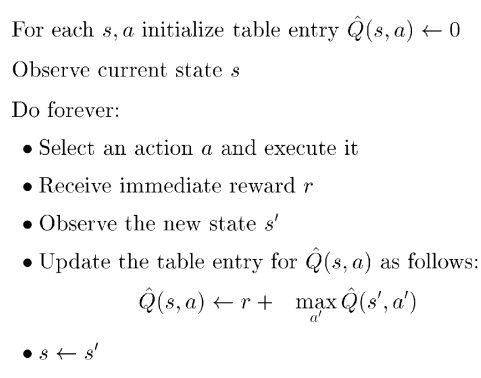

In [3]:
# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n]) 

In [4]:
# Set learning parameters
num_episodes = 2000 
dis = 0.9

In [7]:
# Create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
  # Reset environment and get first new observation
  state = env.reset()
  rAll = 0
  done = False

  # The E-greedy algorithm
  while not done:
    e = 1. / ((i // 100) + 1)

    if np.random.rand(1) < e:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :])

    # Get new state and reward from environment
    new_state, reward, done, _ = env.step(action)

    # Update Q-Table with new knowledge using learning rate
    Q[state, action] = reward + dis * np.max(Q[new_state, :])

    rAll += reward
    state = new_state
  
  rList.append(rAll)

Success rate: 0.804
Final Q-Table Values
LEFT DOWN RIGHT UP
[[0.531441 0.59049  0.59049  0.531441]
 [0.531441 0.       0.6561   0.59049 ]
 [0.59049  0.729    0.59049  0.6561  ]
 [0.6561   0.       0.59049  0.59049 ]
 [0.59049  0.6561   0.       0.531441]
 [0.       0.       0.       0.      ]
 [0.       0.81     0.       0.6561  ]
 [0.       0.       0.       0.      ]
 [0.6561   0.       0.729    0.59049 ]
 [0.6561   0.81     0.81     0.      ]
 [0.729    0.9      0.       0.729   ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.81     0.9      0.729   ]
 [0.81     0.9      1.       0.81    ]
 [0.       0.       0.       0.      ]]


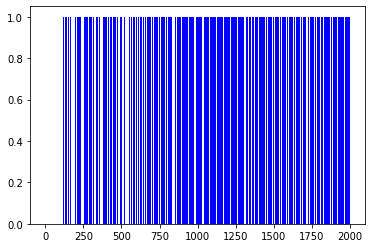

In [8]:
print('Success rate: ' + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()